# Step-1: Importing Libraries and Required Files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
import keras 
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
tf.debugging.set_log_device_placement(False) 
import warnings
warnings.filterwarnings('ignore')

In [2]:
tf.random.set_seed(14) 

In [3]:
df=pd.read_csv(r"D:\EXCELR\DATA SCIENCE\Assignments\18. Neural Networks\gas_turbines.csv")
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


# Step-2: EDA

In [4]:
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df1=df[['AT','AP','AH','TEY']]
df1.head()

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TEY     15039 non-null  float64
dtypes: float64(4)
memory usage: 470.1 KB


In [8]:
df1.describe()

,AT,AP,AH,TEY
count,15039.000000,15039.00000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,134.188464
std,7.574323,6.41076,13.793439,15.829717
min,0.522300,985.85000,30.344000,100.170000
25%,11.408000,1008.90000,69.750000,127.985000
50%,18.186000,1012.80000,82.266000,133.780000
75%,23.862500,1016.90000,90.043500,140.895000
max,34.929000,1034.20000,100.200000,174.610000


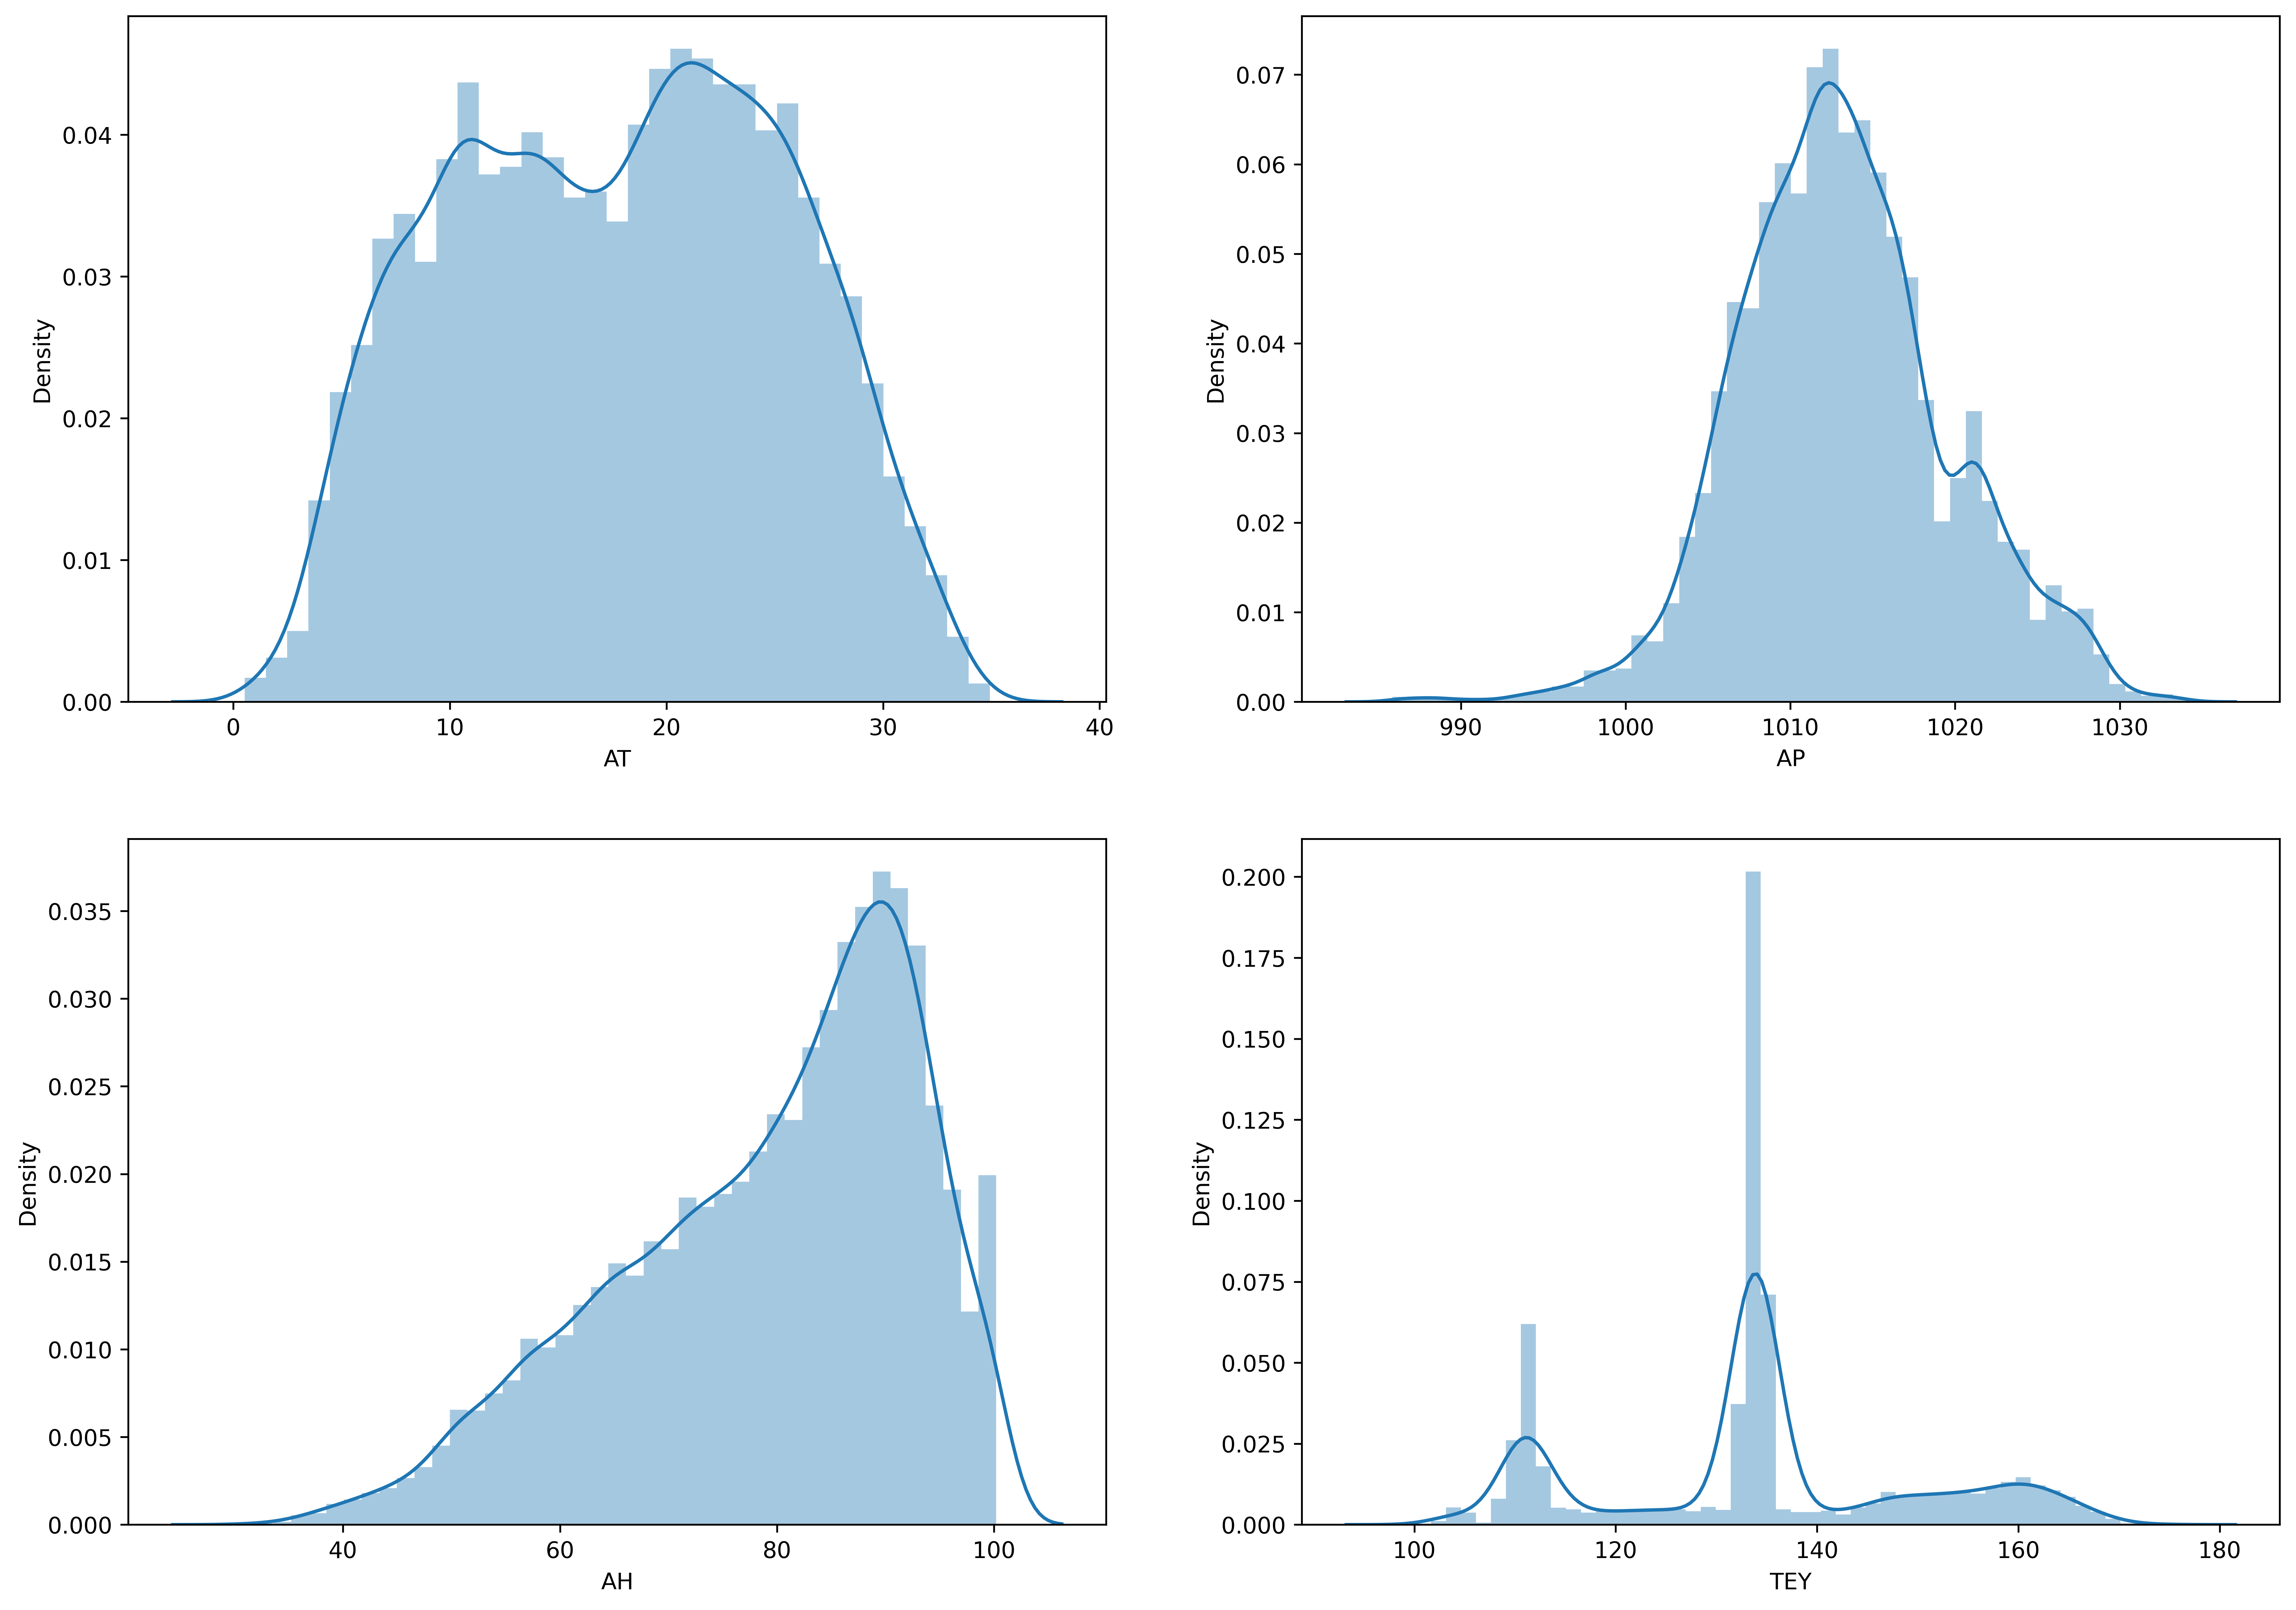

In [9]:
# distplot

fig, ax = plt.subplots(2,2, figsize = (17,12),dpi=600)

sns.distplot(df1.AT, ax = ax[0,0])
sns.distplot(df1.AP, ax = ax[0,1])
sns.distplot(df1.AH, ax = ax[1,0])
sns.distplot(df1.TEY, ax = ax[1,1])
plt.show()

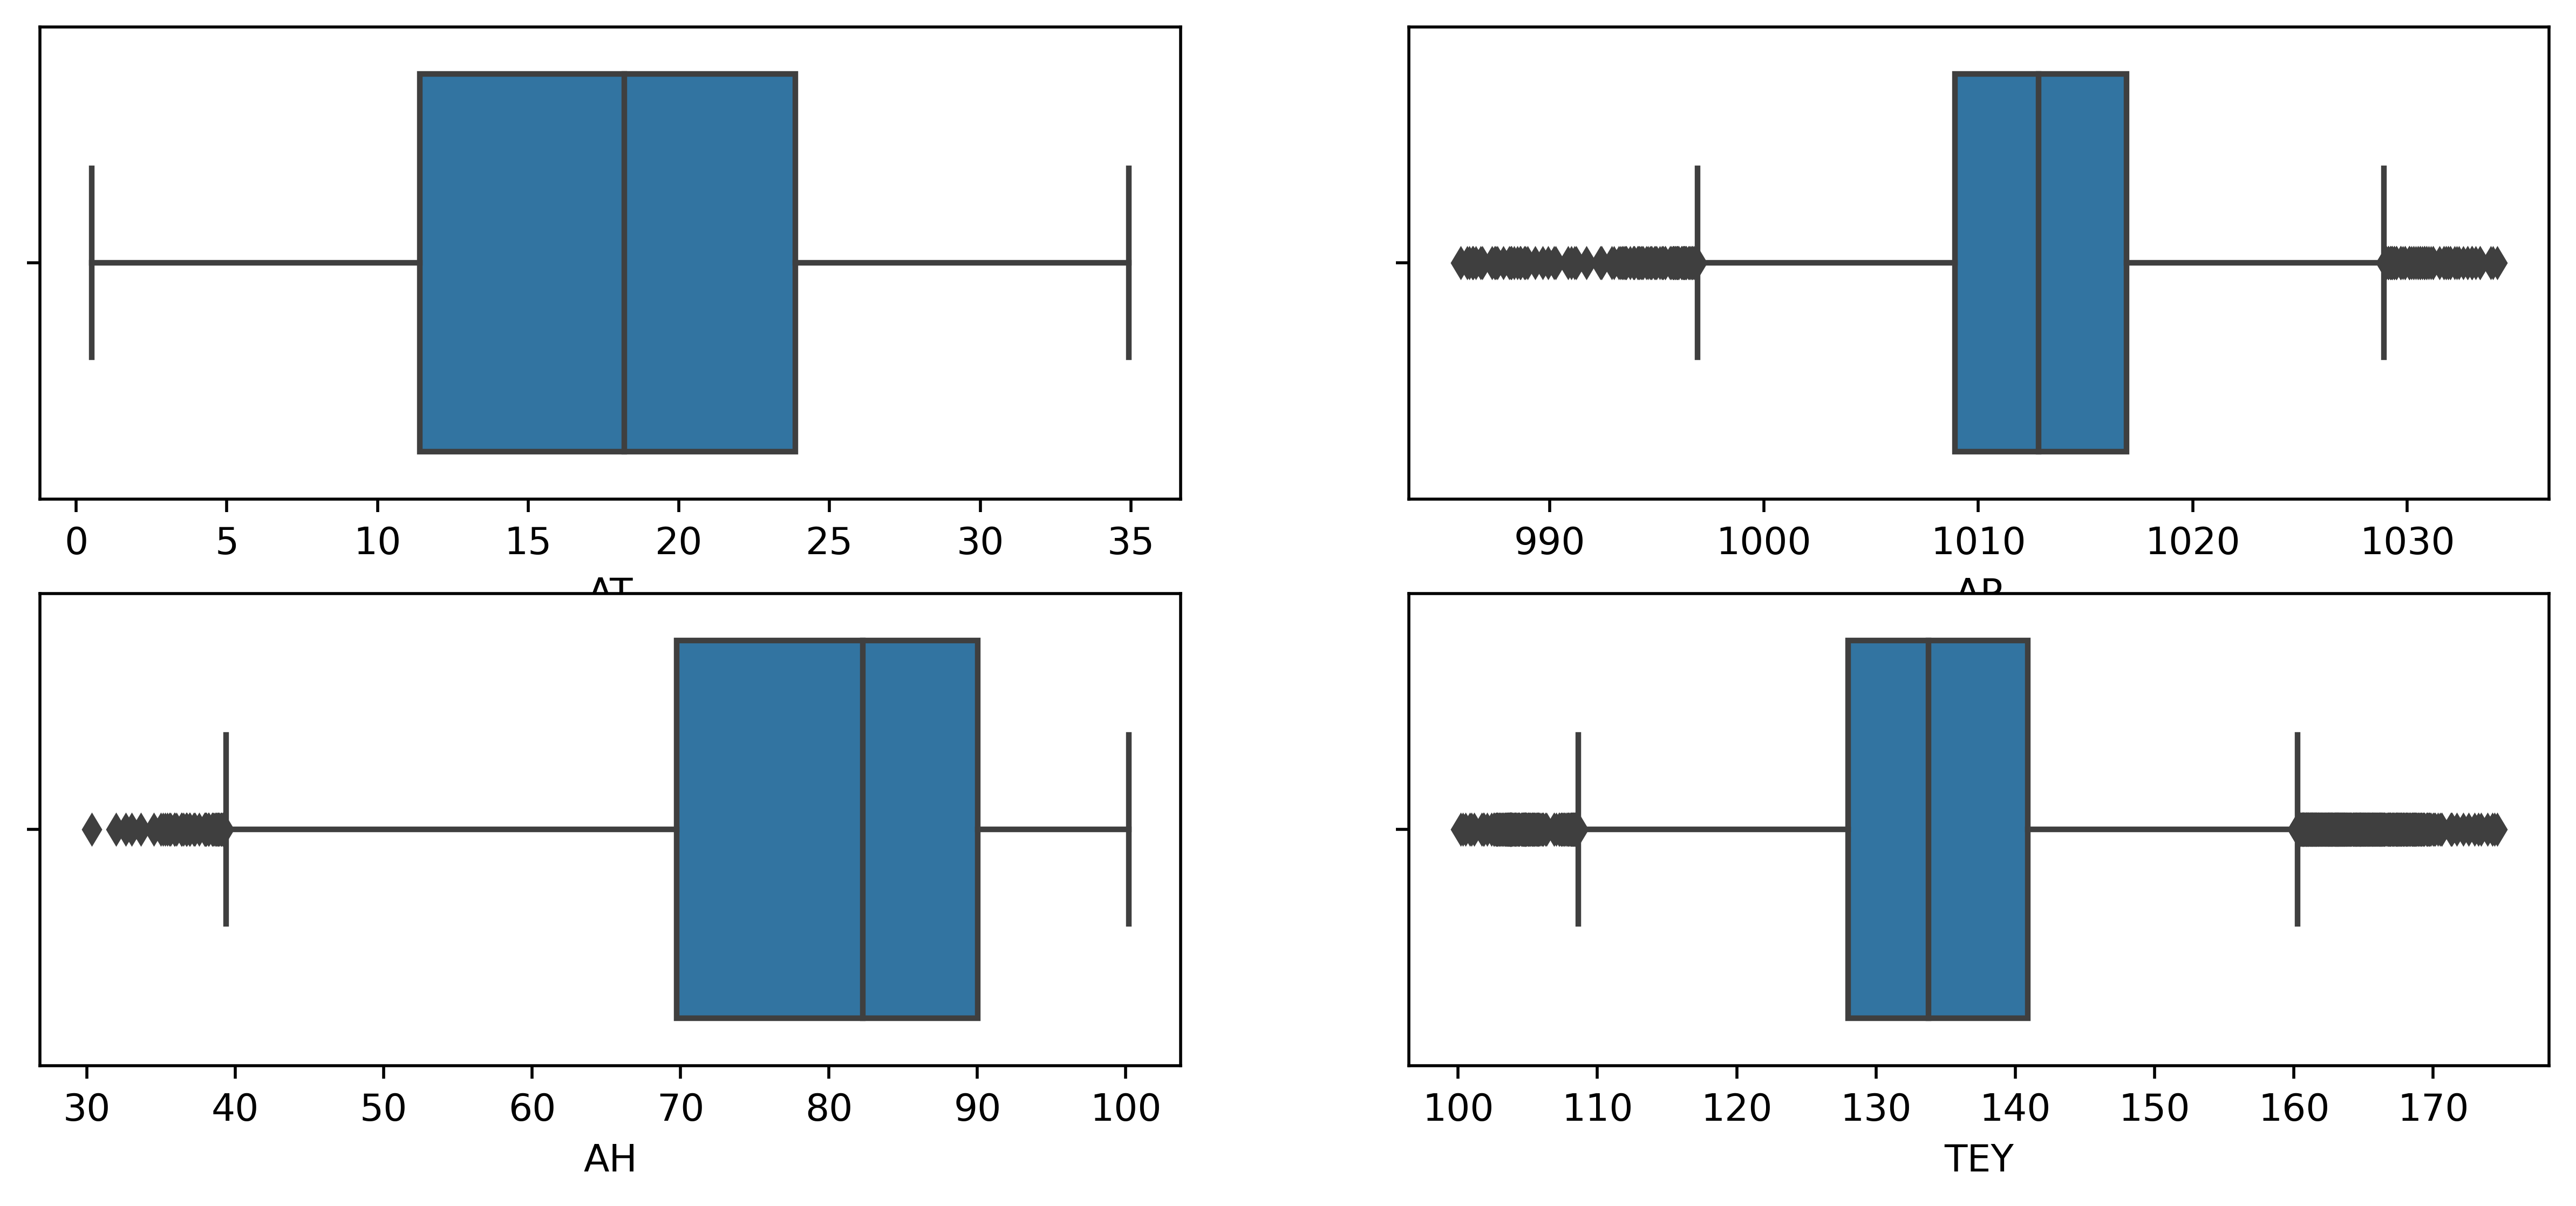

In [10]:
# Box Plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 5),dpi=500)
sns.boxplot(x='AT',data=df1,ax=axes[0,0])
sns.boxplot(x='AP',data=df1,ax=axes[0,1])
sns.boxplot(x='AH',data=df1,ax=axes[1,0])
sns.boxplot(x='TEY',data=df1,ax=axes[1,1])
plt.show()

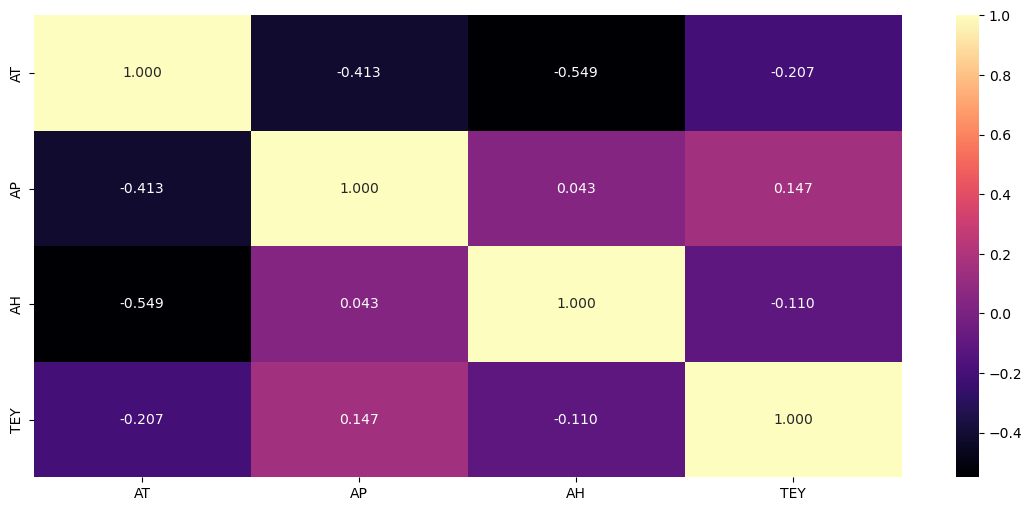

In [11]:
# Correlation

plt.figure(figsize = (14, 6));
sns.heatmap(df1.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

# Step-3: Splitting the Data

In [12]:
from numpy import set_printoptions
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

In [13]:
# Splitting the data into train and test
X =df1.iloc[:,:-1]
Y = df1.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25)

In [14]:
y_train=np.reshape(y_train.to_numpy(), (-1,1)) 
y_test=np.reshape(y_test.to_numpy(), (-1,1)) 

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_test)
xtest_scale=scaler_x.transform(X_test)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_test)
ytest_scale=scaler_y.transform(y_test)

In [16]:
len(xtrain_scale)

11279

In [17]:
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(X, Y)

In [18]:
scores = fit.scores_
features = fit.transform(X)

In [19]:
score_df = pd.DataFrame(list(zip(scores, X.columns)), columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
0,0.412751,AT
1,0.138391,AP
2,0.097693,AH


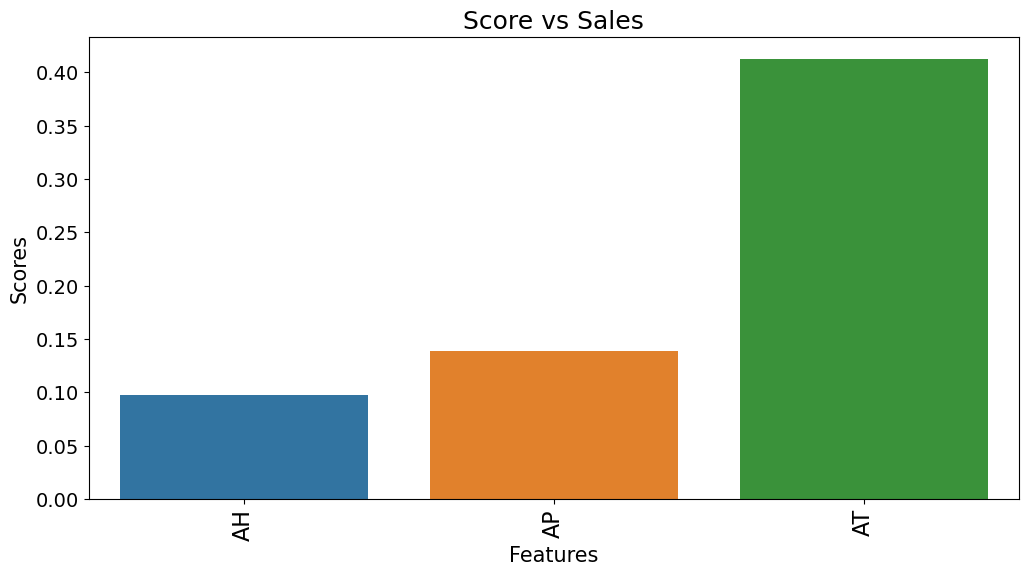

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(x='Feature', y="Score", data=score_df, order=score_df.sort_values('Score').Feature)
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Score vs Sales", size=18)
plt.show()

In [21]:
score_df.sort_values('Score', ascending=False)

,Score,Feature
0,0.412751,AT
1,0.138391,AP
2,0.097693,AH


# Step-4: Model Fitting

In [22]:
# Model-1:
model1 = Sequential()
model1.add(Dense(4, input_dim=3, kernel_initializer='normal', activation='relu'))
model1.add(Dense(2106,kernel_initializer='normal', activation='relu'))
model1.add(Dense(1, activation='linear'))

In [23]:
# Compiling the model
model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])

In [24]:
# Fitting the model
hist = model1.fit(xtrain_scale, ytrain_scale, validation_split=0.33, epochs=100, batch_size=150)

Epoch 1/100


51/51 [==============================] - 2s 13ms/step - loss: 0.0688 - mse: 0.0688 - mae: 0.2045 - val_loss: 0.0466 - val_mse: 0.0466 - val_mae: 0.1652
Epoch 2/100
51/51 [==============================] - 0s 7ms/step - loss: 0.0453 - mse: 0.0453 - mae: 0.1558 - val_loss: 0.0448 - val_mse: 0.0448 - val_mae: 0.1548
Epoch 3/100
51/51 [==============================] - 0s 7ms/step - loss: 0.0444 - mse: 0.0444 - mae: 0.1562 - val_loss: 0.0438 - val_mse: 0.0438 - val_mae: 0.1550
Epoch 4/100
51/51 [==============================] - 0s 7ms/step - loss: 0.0433 - mse: 0.0433 - mae: 0.1555 - val_loss: 0.0430 - val_mse: 0.0430 - val_mae: 0.1551
Epoch 5/100
51/51 [==============================] - 0s 8ms/step - loss: 0.0427 - mse: 0.0427 - mae: 0.1578 - val_loss: 0.0423 - val_mse: 0.0423 - val_mae: 0.1581
Epoch 6/100
51/51 [==============================] - 0s 8ms/step - loss: 0.0423 - mse: 0.0423 - mae: 0.1602 - val_loss: 0.0421 - val_mse: 0.0421 - val_mae: 0.1590
Epoch 7/100
51/51 [

51/51 [==============================] - 0s 7ms/step - loss: 0.0394 - mse: 0.0394 - mae: 0.1580 - val_loss: 0.0390 - val_mse: 0.0390 - val_mae: 0.1566
Epoch 49/100
51/51 [==============================] - 0s 8ms/step - loss: 0.0399 - mse: 0.0399 - mae: 0.1591 - val_loss: 0.0404 - val_mse: 0.0404 - val_mae: 0.1601
Epoch 50/100
51/51 [==============================] - 0s 6ms/step - loss: 0.0393 - mse: 0.0393 - mae: 0.1576 - val_loss: 0.0390 - val_mse: 0.0390 - val_mae: 0.1572
Epoch 51/100
51/51 [==============================] - 0s 7ms/step - loss: 0.0394 - mse: 0.0394 - mae: 0.1582 - val_loss: 0.0390 - val_mse: 0.0390 - val_mae: 0.1565
Epoch 52/100
51/51 [==============================] - 0s 7ms/step - loss: 0.0392 - mse: 0.0392 - mae: 0.1574 - val_loss: 0.0390 - val_mse: 0.0390 - val_mae: 0.1576
Epoch 53/100
51/51 [==============================] - 0s 8ms/step - loss: 0.0395 - mse: 0.0395 - mae: 0.1584 - val_loss: 0.0389 - val_mse: 0.0389 - val_mae: 0.1567
Epoch 54/100
51/51 [=========

51/51 [==============================] - 0s 8ms/step - loss: 0.0389 - mse: 0.0389 - mae: 0.1552 - val_loss: 0.0384 - val_mse: 0.0384 - val_mae: 0.1544
Epoch 99/100
51/51 [==============================] - 0s 8ms/step - loss: 0.0387 - mse: 0.0387 - mae: 0.1550 - val_loss: 0.0385 - val_mse: 0.0385 - val_mae: 0.1552
Epoch 100/100
51/51 [==============================] - 0s 7ms/step - loss: 0.0389 - mse: 0.0389 - mae: 0.1555 - val_loss: 0.0395 - val_mse: 0.0395 - val_mae: 0.1569


In [25]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 16        
                                                                 
 dense_1 (Dense)             (None, 2106)              10530     
                                                                 
 dense_2 (Dense)             (None, 1)                 2107      
                                                                 
Total params: 12653 (49.43 KB)
Trainable params: 12653 (49.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# Model-2:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')])

In [27]:
# Compiling the model
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [28]:
# Fitting the Model
model2.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
705/705 [==============================] - 4s 4ms/step - loss: 375.3729 - mae: 13.5766 - val_loss: 240.3916 - val_mae: 11.5892
Epoch 2/50
705/705 [==============================] - 2s 3ms/step - loss: 248.4499 - mae: 12.1222 - val_loss: 230.5223 - val_mae: 11.3395
Epoch 3/50
705/705 [==============================] - 2s 3ms/step - loss: 240.6368 - mae: 12.0057 - val_loss: 238.4830 - val_mae: 12.2023
Epoch 4/50
705/705 [==============================] - 2s 3ms/step - loss: 236.7476 - mae: 12.0901 - val_loss: 220.7977 - val_mae: 11.5239
Epoch 5/50
705/705 [==============================] - 2s 3ms/step - loss: 238.8338 - mae: 12.2648 - val_loss: 219.8751 - val_mae: 11.6159
Epoch 6/50
705/705 [==============================] - 2s 3ms/step - loss: 233.7109 - mae: 12.1540 - val_loss: 233.2942 - val_mae: 12.3008
Epoch 7/50
705/705 [==============================] - 2s 3ms/step - loss: 235.4304 - mae: 12.2394 - val_loss: 223.7182 - val_mae: 11.9531
Epoch 8/50
705/705 [==============

In [29]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                128       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 673 (2.63 KB)
Trainable params: 673 (2.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
# Model-3:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')])

In [31]:
# Compiling the Model
model3.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mse'])

In [32]:
# Fitting the Model
model3.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
353/353 [==============================] - 3s 4ms/step - loss: 13.0119 - mse: 364.8536 - val_loss: 11.0754 - val_mse: 241.7170
Epoch 2/100
353/353 [==============================] - 1s 4ms/step - loss: 11.6126 - mse: 247.8904 - val_loss: 11.6154 - val_mse: 241.9361
Epoch 3/100
353/353 [==============================] - 1s 4ms/step - loss: 11.6521 - mse: 245.7081 - val_loss: 11.0519 - val_mse: 237.3952
Epoch 4/100
353/353 [==============================] - 1s 3ms/step - loss: 11.5016 - mse: 243.4576 - val_loss: 11.3209 - val_mse: 239.8151
Epoch 5/100
353/353 [==============================] - 1s 3ms/step - loss: 11.5517 - mse: 244.5146 - val_loss: 11.0866 - val_mse: 235.7631
Epoch 6/100
353/353 [==============================] - 1s 3ms/step - loss: 11.5662 - mse: 244.3828 - val_loss: 11.6494 - val_mse: 242.9965
Epoch 7/100
353/353 [==============================] - 1s 3ms/step - loss: 11.6516 - mse: 243.5905 - val_loss: 11.1256 - val_mse: 235.7668
Epoch 8/100
353/353 [======

353/353 [==============================] - 1s 3ms/step - loss: 11.4515 - mse: 240.5305 - val_loss: 11.0716 - val_mse: 234.5670
Epoch 60/100
353/353 [==============================] - 1s 3ms/step - loss: 11.3443 - mse: 239.6069 - val_loss: 11.1372 - val_mse: 234.4582
Epoch 61/100
353/353 [==============================] - 1s 4ms/step - loss: 11.3178 - mse: 239.5000 - val_loss: 11.3626 - val_mse: 238.3765
Epoch 62/100
353/353 [==============================] - 1s 3ms/step - loss: 11.3381 - mse: 239.9974 - val_loss: 11.2387 - val_mse: 237.7432
Epoch 63/100
353/353 [==============================] - 1s 3ms/step - loss: 11.3755 - mse: 239.4385 - val_loss: 11.1362 - val_mse: 234.5487
Epoch 64/100
353/353 [==============================] - 1s 3ms/step - loss: 11.3238 - mse: 239.5772 - val_loss: 11.0436 - val_mse: 235.3173
Epoch 65/100
353/353 [==============================] - 1s 3ms/step - loss: 11.3122 - mse: 240.7357 - val_loss: 11.1741 - val_mse: 235.8329
Epoch 66/100
353/353 [===========

In [33]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
y_pred1 = model1.predict(xtest_scale)

118/118 [==============================] - 0s 2ms/step


In [35]:
y_pred2 = model2.predict(xtest_scale)

118/118 [==============================] - 0s 2ms/step


In [36]:
y_pred3 = model3.predict(xtest_scale)

118/118 [==============================] - 0s 2ms/step


In [37]:
print(hist.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


In [38]:
hist_df = pd.DataFrame(hist.history)
hist_df["epoch"]=hist.epoch
hist_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
95,0.038618,0.038618,0.154651,0.038360,0.038360,0.154171,95
96,0.038663,0.038663,0.154716,0.039354,0.039354,0.156731,96
97,0.038928,0.038928,0.155246,0.038377,0.038377,0.154364,97
98,0.038700,0.038700,0.155038,0.038466,0.038466,0.155204,98
99,0.038908,0.038908,0.155479,0.039508,0.039508,0.156888,99


# Step-5: Visualizing the Results

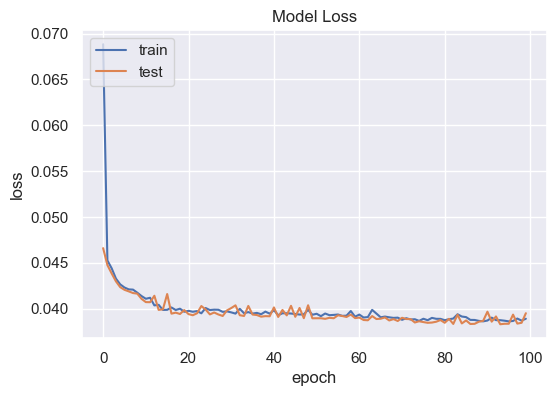

In [39]:
# summarize history for Loss

sns.set(rc={'figure.figsize':(6,4)})

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

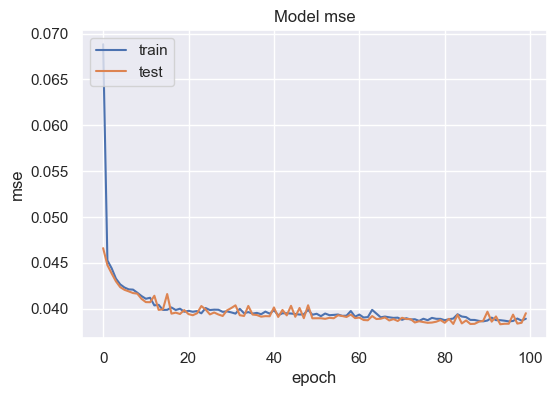

In [40]:
# summarize history for loss

plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.title('Model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()